<a href="https://colab.research.google.com/github/ZykinaViktoriya/Python_for_analytics/blob/main/Seminar4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Задача 1 вещественные данные

Скачать данные по ссылке https://drive.google.com/file/d/1MpAdHAl727fO3oW32NO4FpSRhUBUfjfS

Считать данные с помощью pandas

Вывести на экран первые 5 строк


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Python for analytics/laptops_10.csv')
df.head()

,Company,Product,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,Cpu_Company,Memory_Amount,Memory_Type
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,8GB,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,Intel,128,SSD
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,8GB,Intel HD Graphics 6000,macOS,1.34,898.94,Intel,128,FlashStorage
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8GB,Intel HD Graphics 620,No OS,1.86,575.00,Intel,256,SSD
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7 2.7GHz,16GB,AMD Radeon Pro 455,macOS,1.83,2537.45,Intel,512,SSD
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 3.1GHz,8GB,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,Intel,256,SSD


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 1.1 Изучите распределение количества памяти (Memory_Amount) с помощью matplotlib

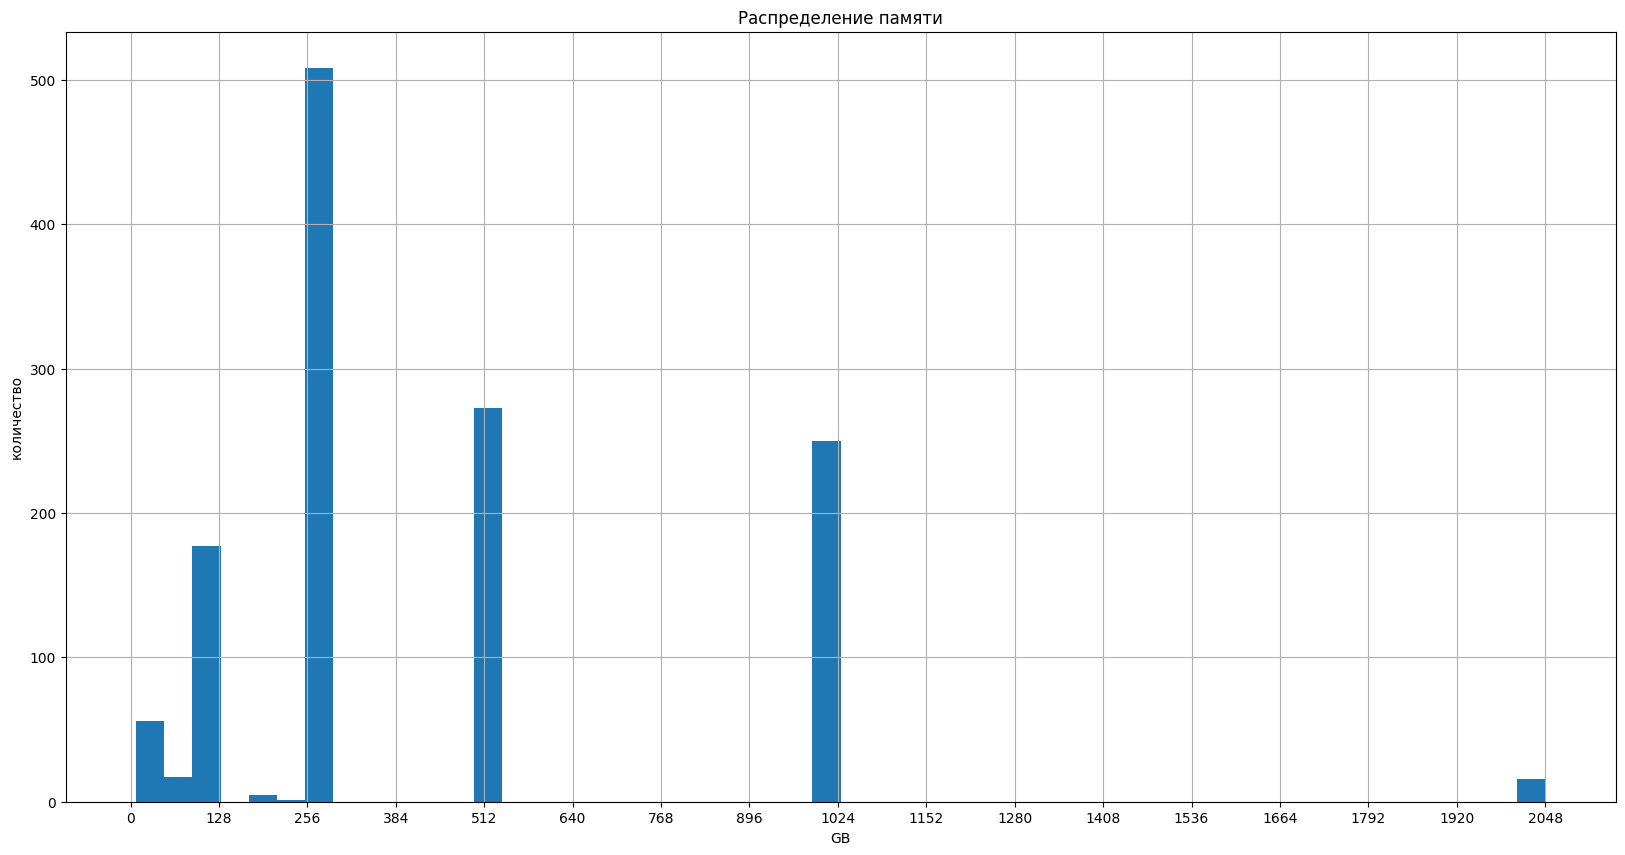

In [4]:
plt.figure(figsize=(20,10))

plt.hist(df['Memory_Amount'], bins= 50)
plt.title('Распределение памяти')
plt.xlabel('GB')
plt.ylabel('количество')
plt.grid()
plt.xticks(range(0, 2100, 128));

### 1.2 Изучите распределение стоимости ноутбуков (Price_euros) с помощью matplotlib

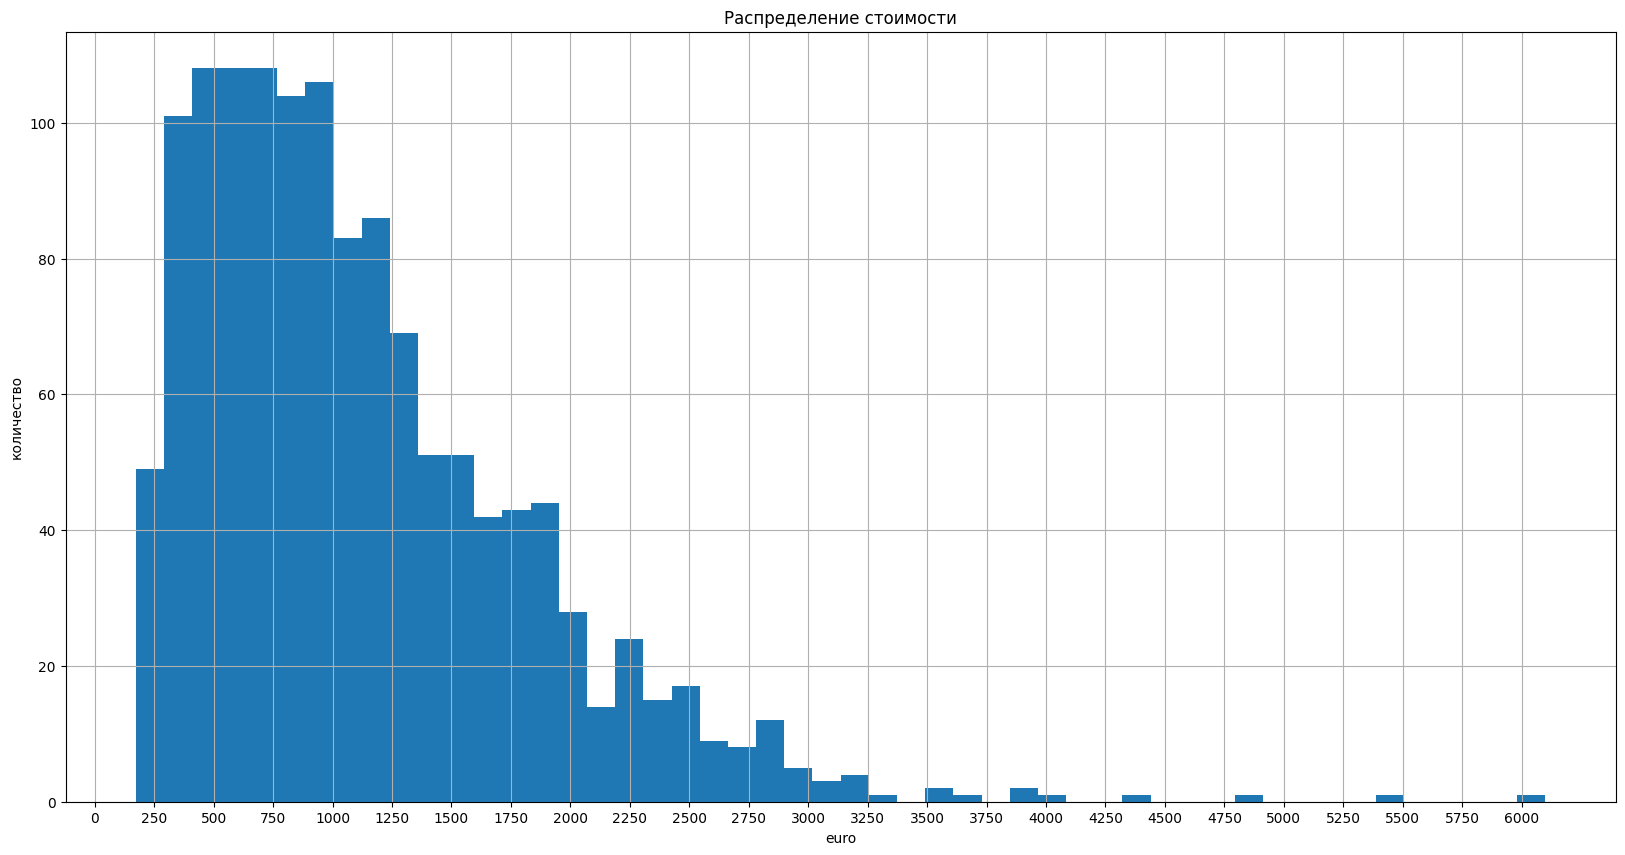

In [5]:
plt.figure(figsize=(20,10))

plt.hist(df['Price_euros'], bins= 50)
plt.title('Распределение стоимости')
plt.xlabel('euro')
plt.ylabel('количество')
plt.grid();
plt.xticks(range(0, 6100, 250));

### 1.3 Изучите распределение веса ноутбуков (Weight) с помощью matplotlib

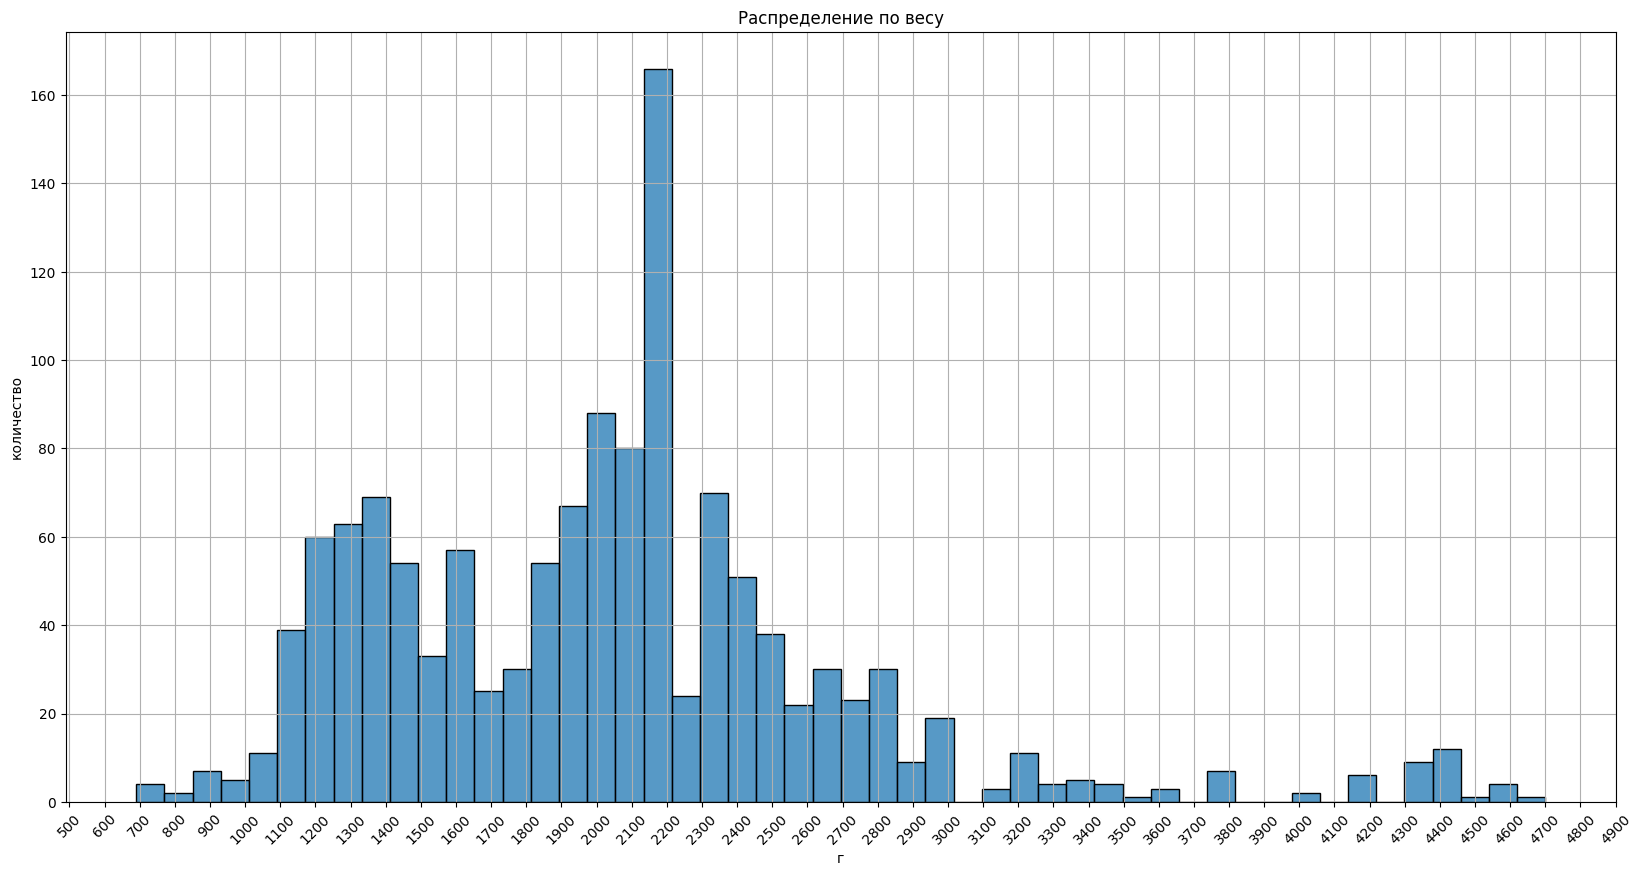

In [6]:
plt.figure(figsize=(20,10))

sns.histplot(df['Weight'], bins= 50)
plt.title('Распределение по весу')
plt.xlabel('г')
plt.ylabel('количество')
plt.grid()
plt.xticks(np.arange(0.5, 5, 0.1),np.arange(500, 5000, 100), rotation=45);


## Задача 2 категориальные признаки(строки)
Постройте график

Сделайте выводы

### 2.1 Изучите распределение типов носителя (Memory_Type)

In [7]:
data = df['Memory_Type'].value_counts()
data

SSD             641
HDD             576
FlashStorage     74
Hybrid           12
Name: Memory_Type, dtype: int64

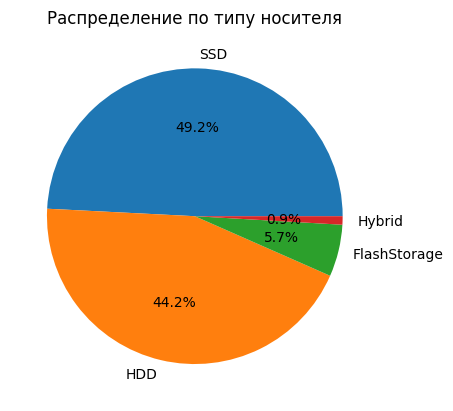

In [8]:
plt.pie(data, labels=data.index, autopct='%1.1f%%')
plt.title('Распределение по типу носителя');

### 2.2 Изучите распределение компаний производителей (Company)

In [9]:
data_company= df['Company'].value_counts()
data_company

Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: Company, dtype: int64

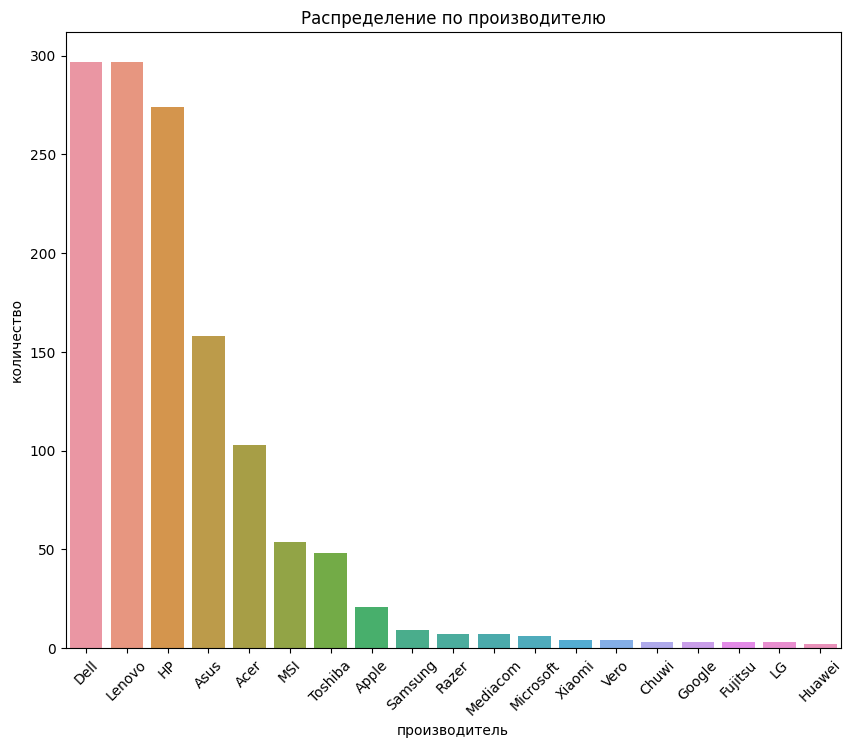

In [10]:
plt.figure(figsize=(10,8))

sns.barplot(x=data_company.index, y=data_company.values)
plt.title('Распределение по производителю')
plt.xlabel('производитель')
plt.ylabel('количество')
plt.xticks(rotation=45);

### 2.3 Изучите распределение операционной системы (OpSys)

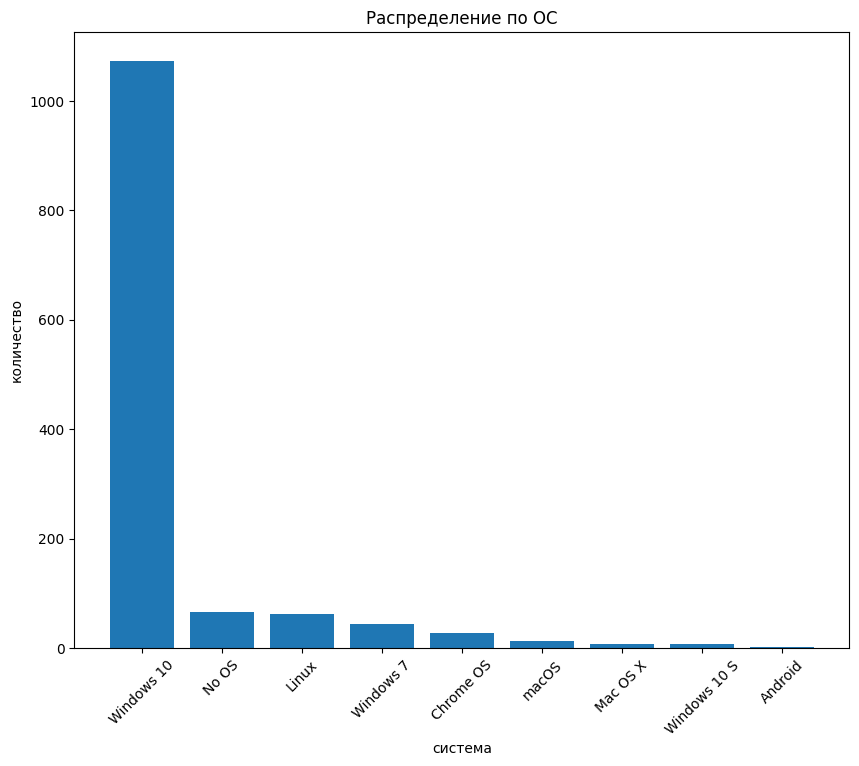

In [11]:
data_os = df['OpSys'].value_counts()
data_os

plt.figure(figsize=(10,8))

plt.bar(data_os.index, data_os)
plt.title('Распределение по ОС')
plt.xlabel('система')
plt.ylabel('количество')
plt.xticks(rotation=45);

###  2.4 Изучите распределение компаний производителей CPU (Cpu_Company

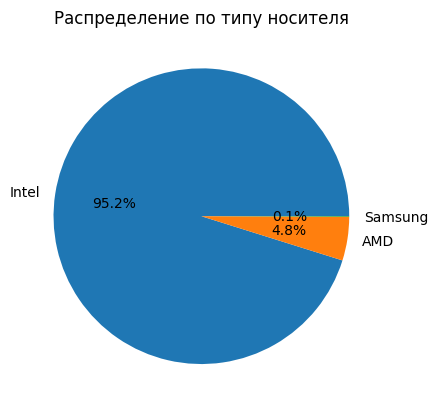

In [12]:
data = df['Cpu_Company'].value_counts()
data

plt.pie(data, labels=data.index, autopct='%1.1f%%')
plt.title('Распределение по типу носителя');

## Задача 3

Изучите взаимосвязь компаний производителей ноутбуков и компаний производителей процессоров, используя сложенную или многорядовую столбчатую диаграмму
Процессоры от Samsung не изучайте


### 3.1 Постройте график в абсолютных величинах

In [15]:
data = pd.crosstab(index = df['Company'], columns = df['Cpu_Company'])
data = data.drop(columns = ['Samsung']).reset_index()
data

Cpu_Company,Company,AMD,Intel
0,Acer,10,93
1,Apple,0,21
2,Asus,11,147
3,Chuwi,0,3
4,Dell,0,297
5,Fujitsu,0,3
6,Google,0,3
7,HP,25,249
8,Huawei,0,2
9,LG,0,3


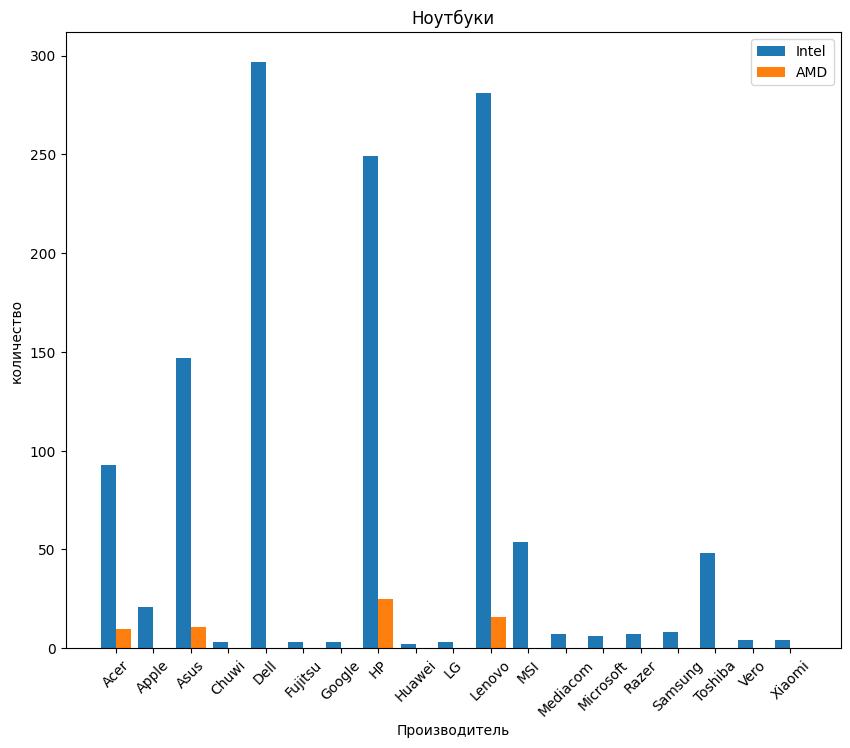

In [29]:
plt.figure(figsize=(10,8))
n_ticks = np.arange(len(data['AMD']))

offset = 0.2
w = 0.4

plt.bar(n_ticks - offset, data['Intel'], width=w)
plt.bar(n_ticks + offset, data['AMD'], width=w)
plt.title('Ноутбуки')
plt.xlabel('Производитель')
plt.ylabel('количество')
plt.legend(['Intel', 'AMD'])
plt.xticks(n_ticks, data['Company'], rotation = 45);

### 3.1 Постройте график в относительных величинах

In [31]:
data = pd.crosstab(index = df['Company'], columns = df['Cpu_Company'], normalize='index')
data = data.drop(columns = ['Samsung']).reset_index()
data

Cpu_Company,Company,AMD,Intel
0,Acer,0.097087,0.902913
1,Apple,0.000000,1.000000
2,Asus,0.069620,0.930380
3,Chuwi,0.000000,1.000000
4,Dell,0.000000,1.000000
5,Fujitsu,0.000000,1.000000
6,Google,0.000000,1.000000
7,HP,0.091241,0.908759
8,Huawei,0.000000,1.000000
9,LG,0.000000,1.000000


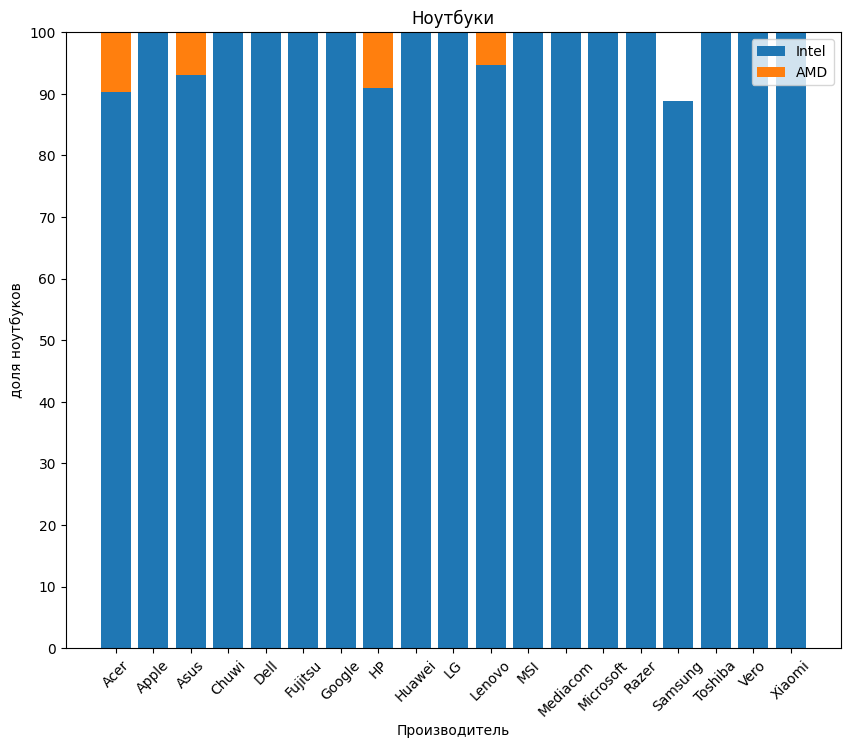

In [37]:
plt.figure(figsize=(10,8))


plt.bar(data['Company'], data['Intel'])
plt.bar(data['Company'], data['AMD'], bottom=data['Intel'])
plt.title('Ноутбуки')
plt.xlabel('Производитель')
plt.ylabel('доля ноутбуков')
plt.legend(['Intel', 'AMD'])
plt.yticks(np.arange(0,1.1,0.1), np.arange(0,110,10))
plt.xticks(rotation=45);

## Задача 4

### 4.1 Изучите взаимосвязь стоимости ноутбука и компании производителя процессора

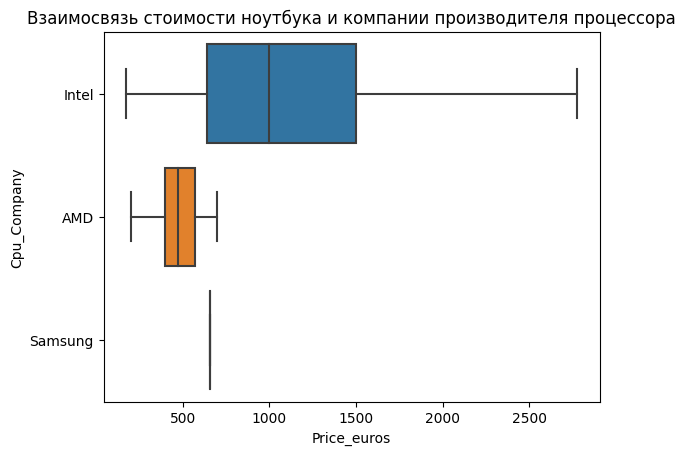

In [39]:
sns.boxplot(x=df['Price_euros'], y= df['Cpu_Company'], showfliers=False)

plt.title('Взаимосвязь стоимости ноутбука и компании производителя процессора');


### 4.2 Изучите взаимосвязь стоимости ноутбука и типа носителя памяти

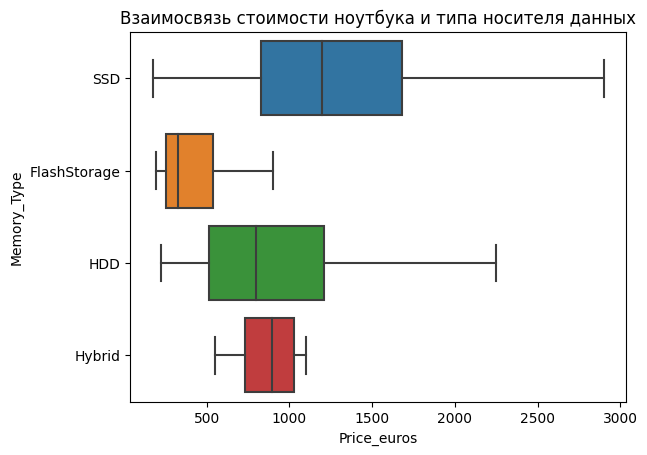

In [41]:
sns.boxplot(x=df['Price_euros'], y= df['Memory_Type'], showfliers=False)

plt.title('Взаимосвязь стоимости ноутбука и типа носителя данных');

### 4.3 Изучите взаимосвязь стоимости ноутбука и кол-ва оперативной памяти



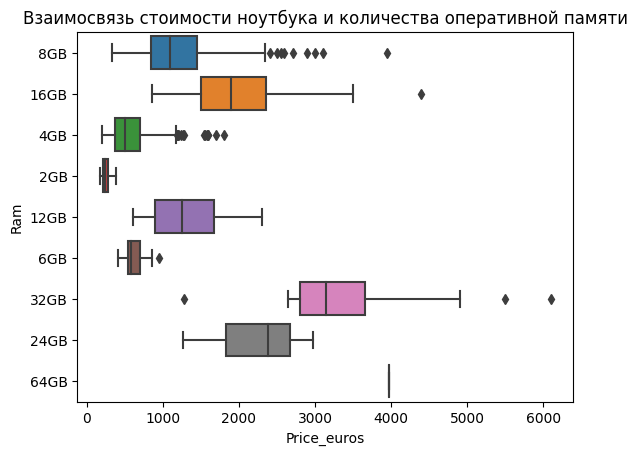

In [43]:
sns.boxplot(x=df['Price_euros'], y= df['Ram'])

plt.title('Взаимосвязь стоимости ноутбука и количества оперативной памяти');

### 4.4 Изучите взаимосвязь стоимости ноутбука и компании производителя

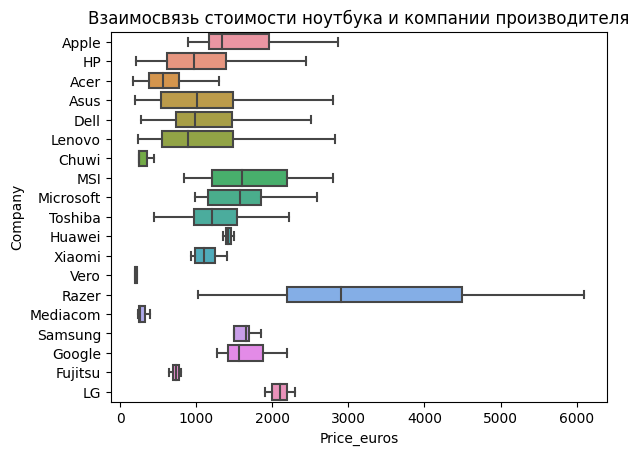

In [44]:
sns.boxplot(x=df['Price_euros'], y= df['Company'], showfliers=False)

plt.title('Взаимосвязь стоимости ноутбука и компании производителя');

 ## Задача 5

### Постройте матрицу корреляций для таблицы

In [47]:
corr_matrix = df.corr()
corr_matrix.round(1)

<ipython-input-47-960fa8c2e151>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


,Inches,Weight,Price_euros,Memory_Amount
Inches,1.0,0.8,0.1,0.3
Weight,0.8,1.0,0.2,0.2
Price_euros,0.1,0.2,1.0,-0.1
Memory_Amount,0.3,0.2,-0.1,1.0


<Axes: >

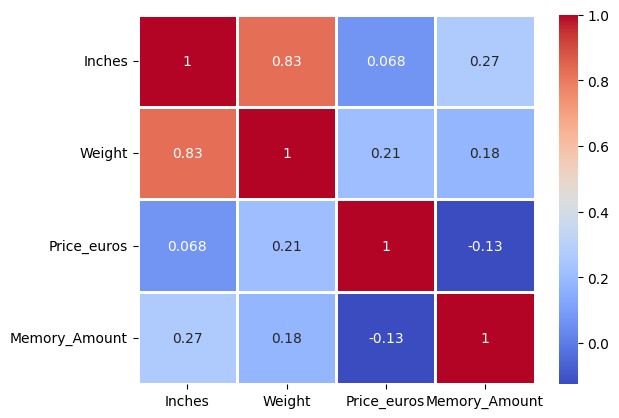

In [52]:
sns.heatmap(corr_matrix, annot=True, linewidths=1, cmap='coolwarm')